In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

## load data

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

In [3]:
# # metadata 
# print(breast_cancer_wisconsin_diagnostic.metadata)

In [4]:
# # variable information 
# print(breast_cancer_wisconsin_diagnostic.variables) 

In [5]:
X

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
y

,Diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [7]:
y.value_counts()

Diagnosis
B            357
M            212
Name: count, dtype: int64

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [9]:
X.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


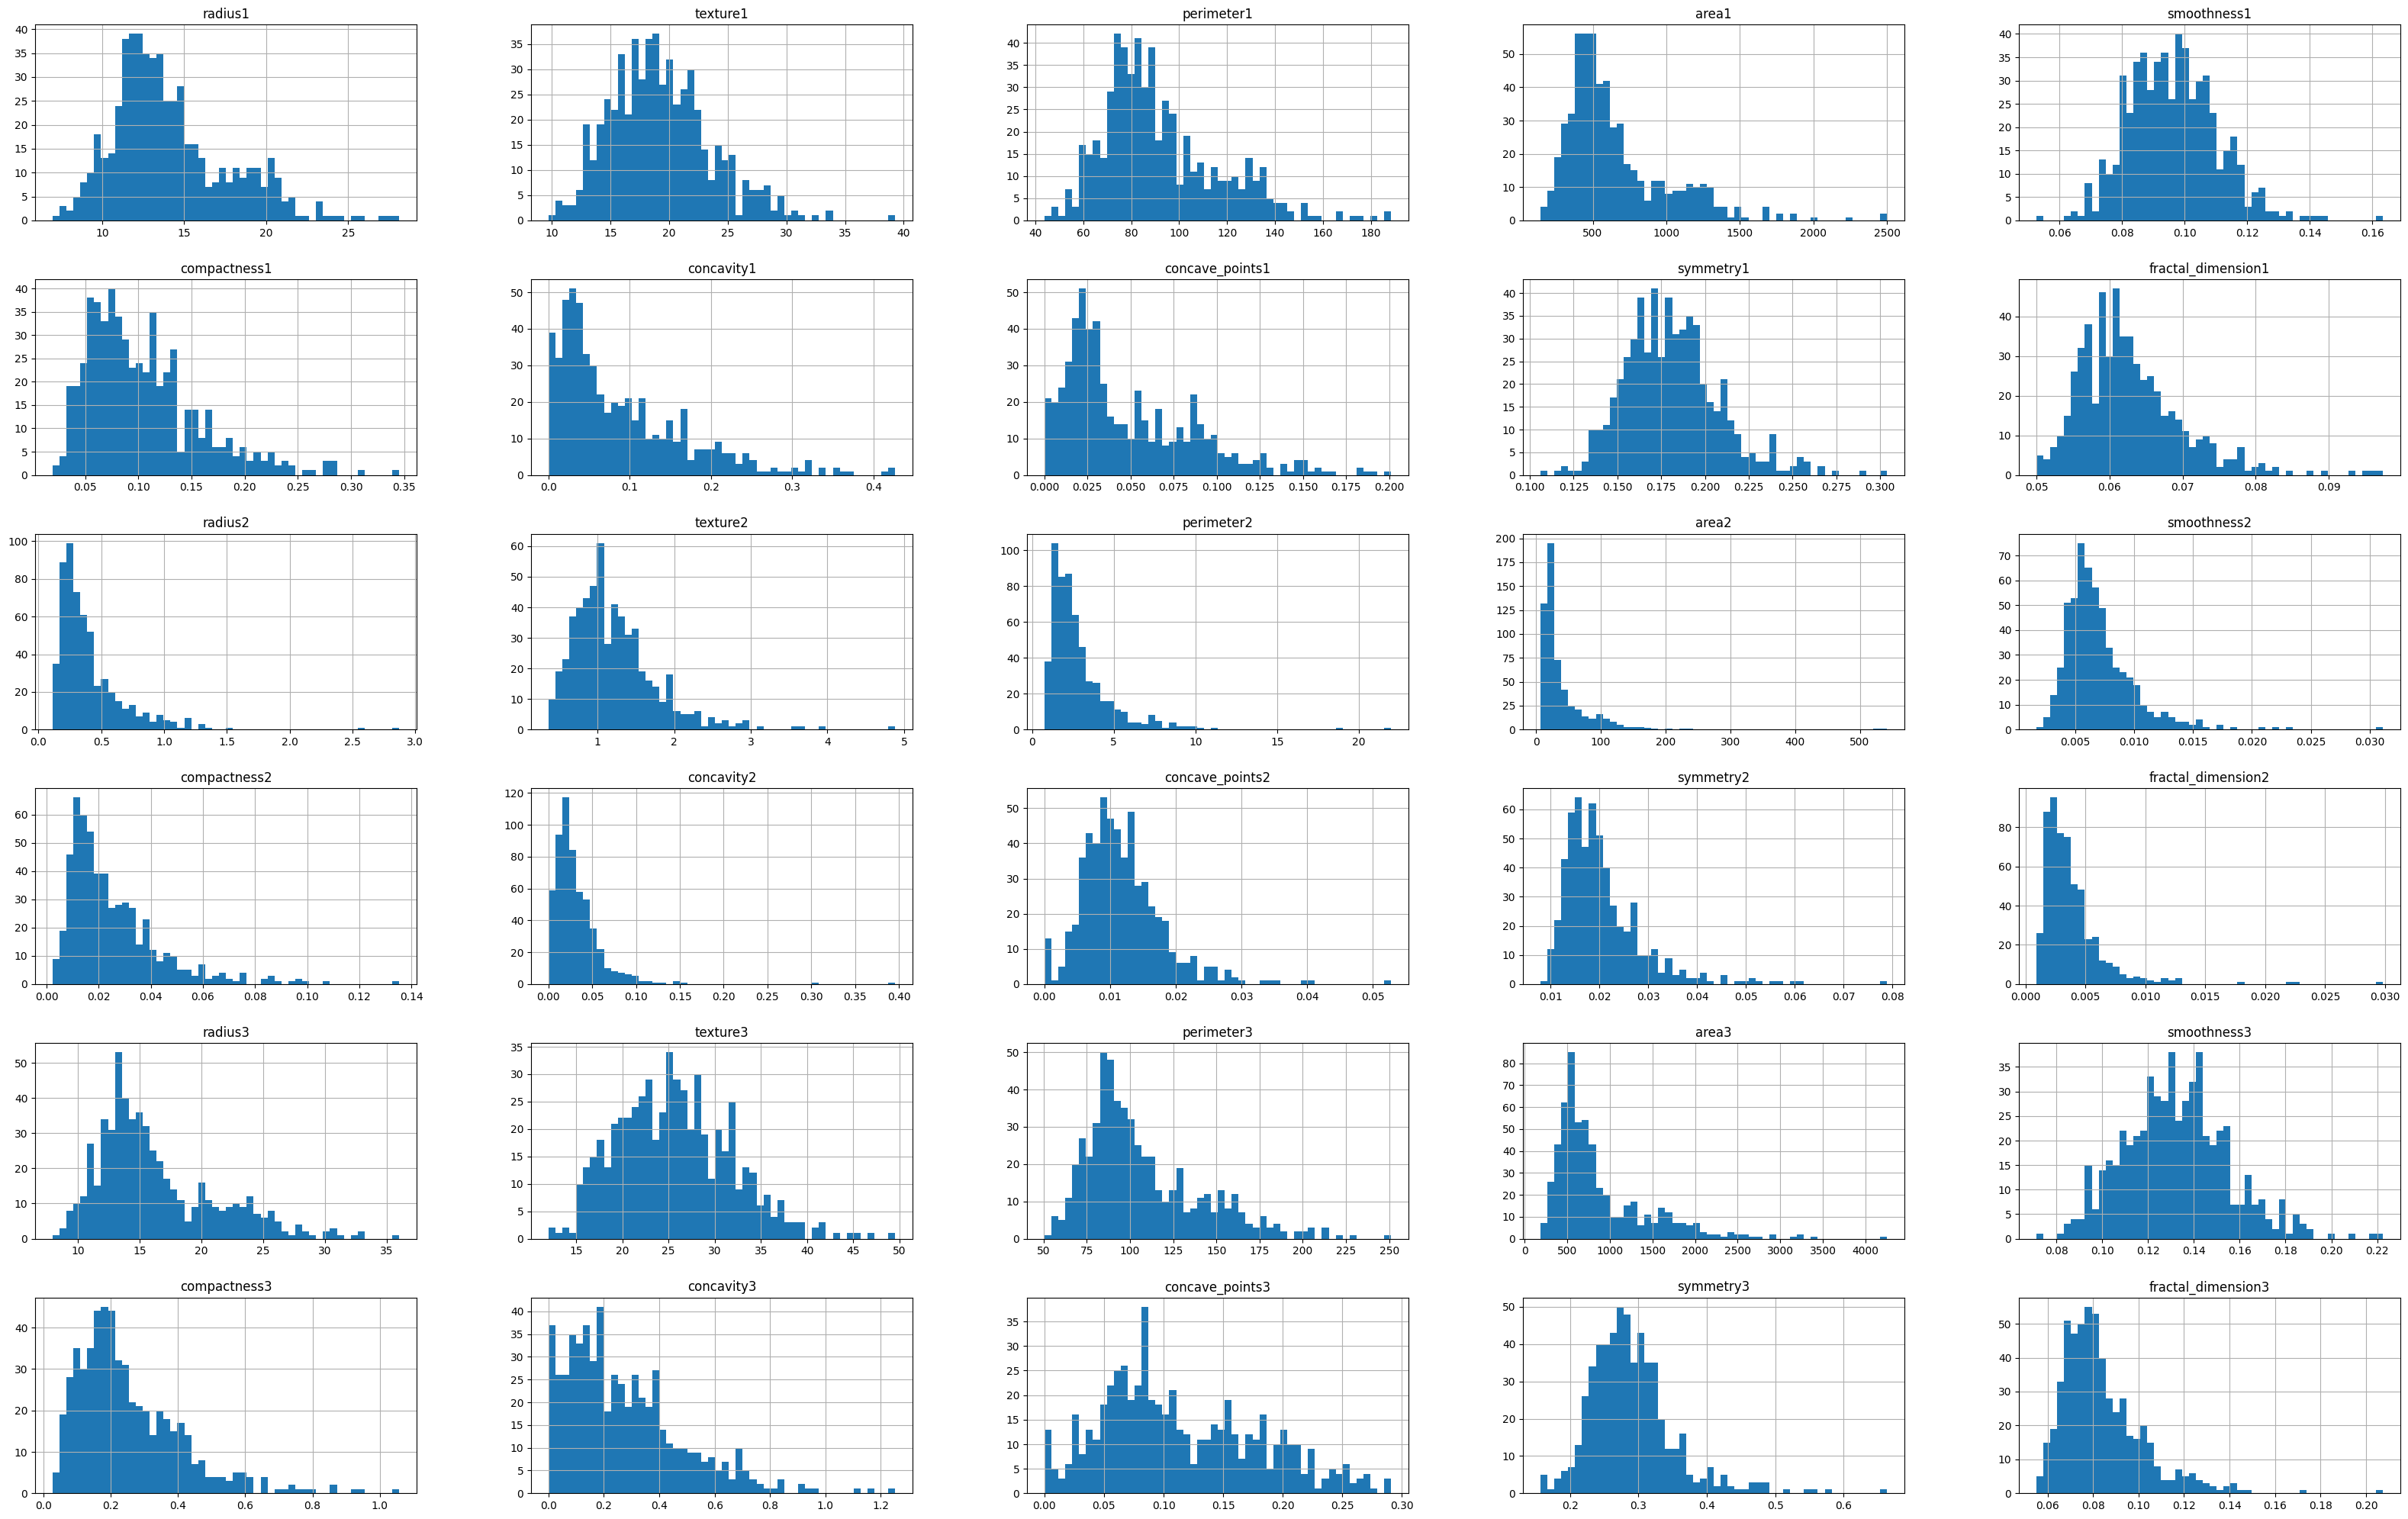

In [10]:
X.hist(bins=50, figsize=(40, 25))
plt.show()

<Axes: >

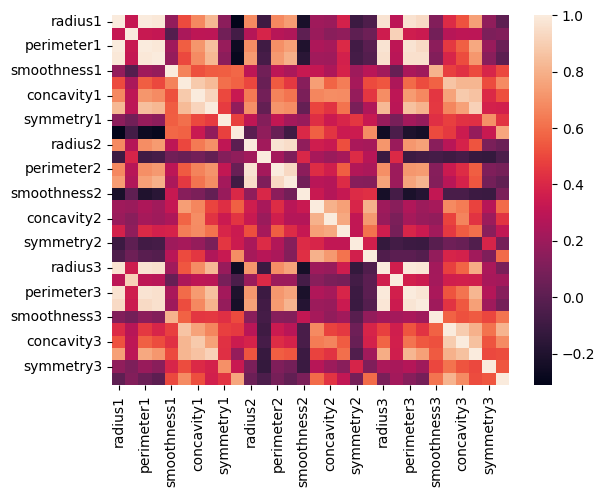

In [11]:
correlation = X.corr(numeric_only=True)
sns.heatmap(correlation, fmt=".1f")

## splitting data

In [12]:
ordinal_enc = OrdinalEncoder()
y = ordinal_enc.fit_transform(y)

In [13]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381 entries, 172 to 102
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             381 non-null    float64
 1   texture1            381 non-null    float64
 2   perimeter1          381 non-null    float64
 3   area1               381 non-null    float64
 4   smoothness1         381 non-null    float64
 5   compactness1        381 non-null    float64
 6   concavity1          381 non-null    float64
 7   concave_points1     381 non-null    float64
 8   symmetry1           381 non-null    float64
 9   fractal_dimension1  381 non-null    float64
 10  radius2             381 non-null    float64
 11  texture2            381 non-null    float64
 12  perimeter2          381 non-null    float64
 13  area2               381 non-null    float64
 14  smoothness2         381 non-null    float64
 15  compactness2        381 non-null    float64
 16  concavity2 

In [15]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 204 to 19
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             188 non-null    float64
 1   texture1            188 non-null    float64
 2   perimeter1          188 non-null    float64
 3   area1               188 non-null    float64
 4   smoothness1         188 non-null    float64
 5   compactness1        188 non-null    float64
 6   concavity1          188 non-null    float64
 7   concave_points1     188 non-null    float64
 8   symmetry1           188 non-null    float64
 9   fractal_dimension1  188 non-null    float64
 10  radius2             188 non-null    float64
 11  texture2            188 non-null    float64
 12  perimeter2          188 non-null    float64
 13  area2               188 non-null    float64
 14  smoothness2         188 non-null    float64
 15  compactness2        188 non-null    float64
 16  concavity2  

## scaling

In [16]:
X_train_numerical = X_train.select_dtypes(include=[np.number])
X_test_numerical = X_test.select_dtypes(include=[np.number])

In [17]:
scale = StandardScaler()
scale.fit(X_train)

StandardScaler()

In [18]:
X_train_scale = scale.transform(X_train_numerical)
X_test_scale = scale.transform(X_test_numerical)

## training

In [19]:
log_reg=LogisticRegression(random_state=42)
log_reg.fit(X_train_scale,y_train)

/home/ubuntu/mapsa/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

In [20]:
log_reg.coef_

array([[ 0.36048257,  0.37928706,  0.34239942,  0.40981403,  0.0701941 ,
        -0.6382286 ,  0.79808635,  1.0985293 , -0.15315188, -0.11908427,
         1.17747141, -0.22238149,  0.70866434,  0.81444289,  0.20651383,
        -0.53205463, -0.04447138,  0.43698303, -0.49799868, -0.59437411,
         0.76099683,  1.28013819,  0.56382538,  0.71579019,  0.5415975 ,
        -0.09222063,  0.97554811,  0.74688349,  1.16159623,  0.11296927]])

## evaluating

In [21]:
y_predict = log_reg.predict(X_test_scale)
y_predict

array([0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0.])

In [22]:
y_pred_decode = ordinal_enc.inverse_transform(y_predict.reshape(-1, 1))
y_pred_decode

array([['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['M'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['M'],
      

In [23]:
confusion_matrix(y_test,y_predict)

array([[118,   3],
       [  1,  66]])

In [24]:
accuracy_score(y_test,y_predict)

0.9787234042553191